# **Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Loading data to the dataframe**

In [2]:
df = pd.read_csv('/content/mobile_price_classification.csv')

# **Checking the loaded data**

In [3]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# **Checking null values**

In [4]:
df.isna().sum()

battery_power     0
bluetooth         0
clock_speed       0
dual_sim          0
front_cam         0
4G                0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
primary_camera    0
px_height         0
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64

# **Checking the details of the given dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [6]:
df.shape

(2000, 21)

In [7]:
df.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_cam',
       '4G', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'primary_camera',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
df['price_range'].unique()

array([1, 2, 3, 0])

# **Taking price_range column as label and remaining columns as data**

In [9]:
data = df.drop('price_range',axis=1)
label = df['price_range']

# **Scaling the data**

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [11]:
data

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

# **Splitting the data into test and train**

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.25,random_state = 42)

# **Using Sequential model for ANN model building**

In [13]:
from keras.models import Sequential
from keras.layers import Dense

In [14]:
from sklearn.model_selection import KFold
#cross validation
kfold = KFold(n_splits=5, shuffle=True)
cvscores = []

fold_no = 1
for train, test in kfold.split(data, label):
  #creating model
  model = Sequential()
  #creating model architecture
  model.add(Dense(32,activation='relu'))
  model.add(Dense(4,activation='Softmax'))
  #compiling the model
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  #training the model
  history = model.fit(data[train], label.iloc[train],validation_split=0.2, epochs=100)
  #evaluating the model
  scores = model.evaluate(data[test], label.iloc[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

  cvscores.append(scores[1] * 100)
  fold_no = fold_no + 1

print(f"avg Accuracy: {np.mean(cvscores)}")

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/100
40/40 [==============================] - 1s 6ms/step - loss: 1.6900 - accuracy: 0.2188 - val_loss: 1.5419 - val_accuracy: 0.2562
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 1.4480 - accuracy: 0.2766 - val_loss: 1.3822 - val_accuracy: 0.3125
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 1.3150 - accuracy: 0.3719 - val_loss: 1.2783 - val_accuracy: 0.3969
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 1.2158 - accuracy: 0.4523 - val_loss: 1.1928 - val_accuracy: 0.4906
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 1.1284 - accuracy: 0.5102 - val_loss: 1.1162 - val_accuracy: 0.5281
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 1.0478 - accuracy: 0.5672 - val_loss: 1.0426 - val_accuracy: 0.5813
Epoch 7/100
40/40 [==============================] - 0s 3

In [15]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                672       
                                                                 
 dense_9 (Dense)             (None, 4)                 132       
                                                                 
Total params: 804
Trainable params: 804
Non-trainable params: 0
_________________________________________________________________


# **Plotting accuracy and loss of the model**

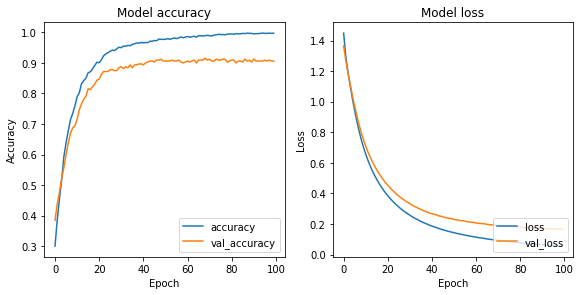

In [17]:
plt.figure(figsize=(25,25))
plt.subplot(5,5,1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(5,5,2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
